In [1]:
# data source: https://www.kaggle.com/datasets/mylesoneill/game-of-thrones?select=character-deaths.csvb

In [2]:
import pandas as pd
import numpy as np
import os

In [3]:
import plotly as py
import plotly.graph_objs as go
# from plotly.graph_objs import *
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [4]:
# read in dataset
# I'm using a data set of all the deaths from A Song of Ice and Fire
df = pd.read_csv("data/asoiaf_book_deaths.csv")


In [5]:
df.head()

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
0,Addam Marbrand,Lannister,NaN,NaN,NaN,56.0,1,1,1,1,1,1,0
1,Aegon Frey (Jinglebell),None,299.0,3.0,51.0,49.0,1,1,0,0,1,0,0
2,Aegon Targaryen,House Targaryen,NaN,NaN,NaN,5.0,1,1,0,0,0,0,1
3,Adrack Humble,House Greyjoy,300.0,5.0,20.0,20.0,1,1,0,0,0,0,1
4,Aemon Costayne,Lannister,NaN,NaN,NaN,NaN,1,1,0,0,1,0,0


In [6]:
## let's make all null values equal to 666 --- these are characters that have not died
df['Death Chapter'].fillna(666, inplace=True)
df['Death Year'].fillna(666, inplace=True)
df['Book of Death'].fillna(666, inplace=True)
df['Book Intro Chapter'].fillna(666, inplace=True)

In [7]:
## remove Null/666's values -- these characters are still alive
df2 = df[df['Death Chapter'] != 666]

In [8]:
df2.describe()

,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,304.043478,7.334448,40.070234,35.257525,0.889632,0.364548,0.344482,0.424749,0.421405,0.100334,0.167224
std,42.224251,54.157568,20.470270,66.618446,0.313873,0.482110,0.475996,0.495134,0.494612,0.300949,0.373801
min,297.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,299.000000,2.000000,25.500000,11.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,299.000000,3.000000,39.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,300.000000,4.000000,57.000000,43.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,666.000000,666.000000,80.000000,666.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
# clean the Allegainces (remove "House")
df2["Allegiances"] = df2["Allegiances"].str.replace("House ","")
df2

# this returns a warning... can't figure out how to not get the warning, so leaving as is 

/tmp/ipykernel_371/1786542482.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
1,Aegon Frey (Jinglebell),None,299.0,3.0,51.0,49.0,1,1,0,0,1,0,0
3,Adrack Humble,Greyjoy,300.0,5.0,20.0,20.0,1,1,0,0,0,0,1
6,Aemon Targaryen (son of Maekar I),Night's Watch,300.0,4.0,35.0,21.0,1,1,1,0,1,1,0
10,Aggar,Greyjoy,299.0,2.0,56.0,50.0,1,0,0,1,0,0,0
12,Alan of Rosby,Night's Watch,300.0,5.0,4.0,18.0,1,1,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
909,Young Henly,Night's Watch,299.0,3.0,55.0,55.0,1,0,0,0,1,0,0
913,Yurkhaz zo Yunzak,None,300.0,5.0,59.0,47.0,1,0,0,0,0,0,1
914,Yezzan Zo Qaggaz,None,300.0,5.0,57.0,25.0,1,1,0,0,0,0,1
915,Torwynd the Tame,Wildling,300.0,5.0,73.0,73.0,1,0,0,0,1,0,0


In [10]:
# which allegiance has the most deaths? Group deaths by allegiance
#first_ten = df2[df2["Book Intro Chapter"] <= 10]
#first_ten.head()
df2_grouped = df2.groupby("Allegiances").count().reset_index()
df2_grouped["Death Count"] = df2_grouped["Death Year"] 
deaths_by_allegiance = df2_grouped[["Allegiances","Death Count"]]
deaths_by_allegiance

,Allegiances,Death Count
0,Arryn,4
1,Baratheon,23
2,Greyjoy,22
3,Lannister,29
4,Martell,3
5,Night's Watch,56
6,None,73
7,Stark,46
8,Targaryen,9
9,Tully,9


In [11]:
# create new dataframe with the location of each Allegiance
Region = pd.DataFrame({'Allegiances': ['Arryn', 'Baratheon', 'Greyjoy', 'Lannister', 'Martell',"Night's Watch",'None','Stark','Targaryen','Tully','Tyrell','Wildling'], 
                       'Westeros Location': ['East', 'East', 'West', 'West', 'South',"North",'None','North','East','Midwest','West','North']})
Region

,Allegiances,Westeros Location
0,Arryn,East
1,Baratheon,East
2,Greyjoy,West
3,Lannister,West
4,Martell,South
5,Night's Watch,North
6,None,None
7,Stark,North
8,Targaryen,East
9,Tully,Midwest


In [12]:
# create a new dataframe, joining the two dataframes
df3 = pd.merge(deaths_by_allegiance, Region, how="left",left_on="Allegiances",right_on="Allegiances")
df3

,Allegiances,Death Count,Westeros Location
0,Arryn,4,East
1,Baratheon,23,East
2,Greyjoy,22,West
3,Lannister,29,West
4,Martell,3,South
5,Night's Watch,56,North
6,None,73,None
7,Stark,46,North
8,Targaryen,9,East
9,Tully,9,Midwest


In [13]:
# createa new dataframe with number of kings/queens by house (through end of GoT Season 8)... then join it to df3

royalty = pd.DataFrame({'Allegiances': ['Targaryen', 'Baratheon', 'Lannister','Stark'], 
                       'Number of Kings/Queens': [18,3,1,1]})
df4 = pd.merge(df3, royalty, how = "left", left_on="Allegiances",right_on="Allegiances")
df4['Number of Kings/Queens'].fillna(0, inplace=True)
df4.sort_values(by=['Death Count'], inplace=True)
df4

,Allegiances,Death Count,Westeros Location,Number of Kings/Queens
10,Tyrell,2,West,0.0
4,Martell,3,South,0.0
0,Arryn,4,East,0.0
8,Targaryen,9,East,18.0
9,Tully,9,Midwest,0.0
2,Greyjoy,22,West,0.0
1,Baratheon,23,East,3.0
11,Wildling,23,North,0.0
3,Lannister,29,West,1.0
7,Stark,46,North,1.0


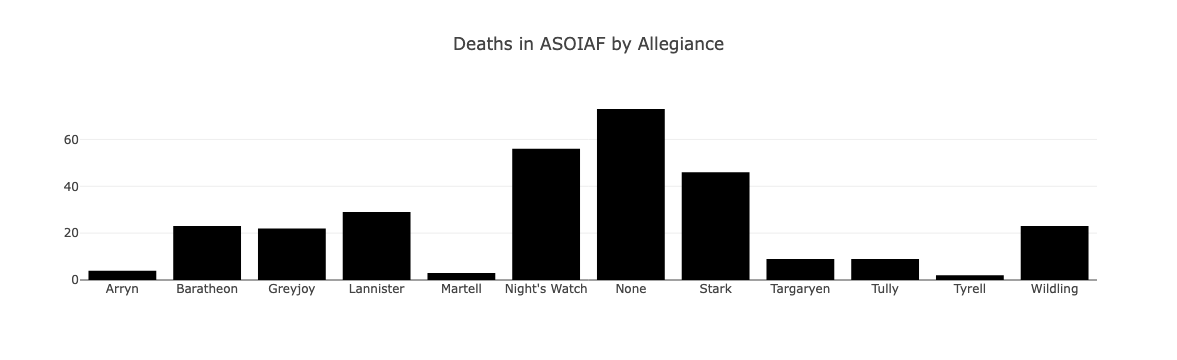

In [14]:
data = [go.Bar(x = df2_grouped['Allegiances'],
               y = df2_grouped['Death Count'],
               marker=dict(color='black')
              )]

layout = dict(title = "Deaths in ASOIAF by Allegiance")
fig = dict(data = data, layout = layout)
iplot(fig, validate = False)

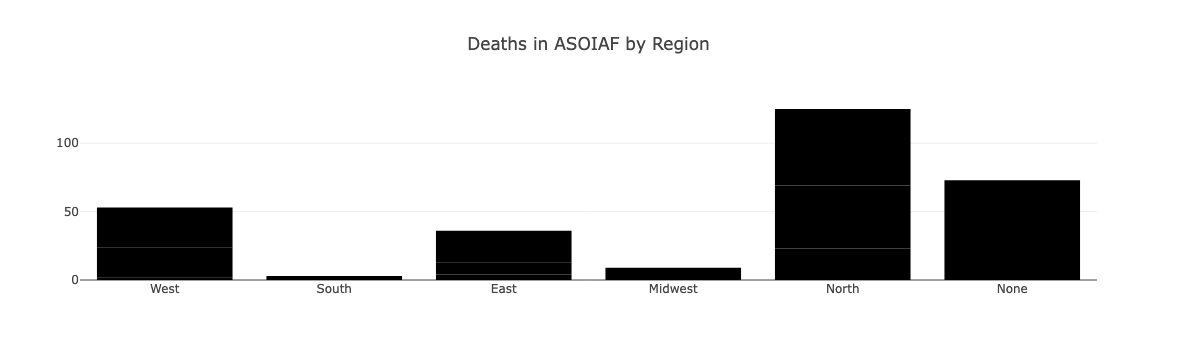

In [15]:
data = [go.Bar(x = df4['Westeros Location'],
               y = df4['Death Count'],
               marker=dict(color='black')
              )]

layout = dict(title = "Deaths in ASOIAF by Region")
fig = dict(data = data, layout = layout)
iplot(fig, validate = False)

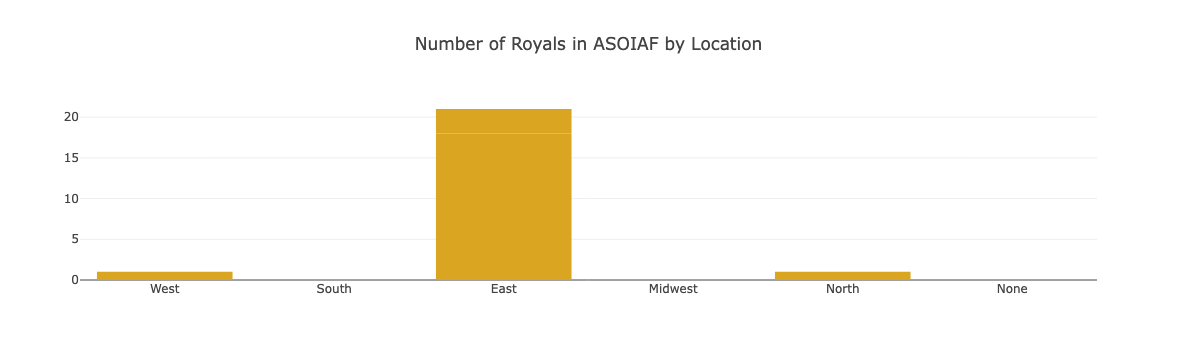

In [16]:
data = [go.Bar(x = df4['Westeros Location'],
               y = df4['Number of Kings/Queens'],
               marker=dict(color='goldenrod')
              )]

layout = dict(title = "Number of Royals in ASOIAF by Location")
fig = dict(data = data, layout = layout)
iplot(fig, validate = False)

In [17]:
## restart everything, more simply
df2["Death Count"] = 1
df2

/tmp/ipykernel_371/606695906.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD,Death Count
1,Aegon Frey (Jinglebell),None,299.0,3.0,51.0,49.0,1,1,0,0,1,0,0,1
3,Adrack Humble,Greyjoy,300.0,5.0,20.0,20.0,1,1,0,0,0,0,1,1
6,Aemon Targaryen (son of Maekar I),Night's Watch,300.0,4.0,35.0,21.0,1,1,1,0,1,1,0,1
10,Aggar,Greyjoy,299.0,2.0,56.0,50.0,1,0,0,1,0,0,0,1
12,Alan of Rosby,Night's Watch,300.0,5.0,4.0,18.0,1,1,0,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
909,Young Henly,Night's Watch,299.0,3.0,55.0,55.0,1,0,0,0,1,0,0,1
913,Yurkhaz zo Yunzak,None,300.0,5.0,59.0,47.0,1,0,0,0,0,0,1,1
914,Yezzan Zo Qaggaz,None,300.0,5.0,57.0,25.0,1,1,0,0,0,0,1,1
915,Torwynd the Tame,Wildling,300.0,5.0,73.0,73.0,1,0,0,0,1,0,0,1


In [18]:
df3a = pd.merge(df3, Region, how="left",left_on="Allegiances",right_on="Allegiances")
df3a

,Allegiances,Death Count,Westeros Location_x,Westeros Location_y
0,Arryn,4,East,East
1,Baratheon,23,East,East
2,Greyjoy,22,West,West
3,Lannister,29,West,West
4,Martell,3,South,South
5,Night's Watch,56,North,North
6,None,73,None,None
7,Stark,46,North,North
8,Targaryen,9,East,East
9,Tully,9,Midwest,Midwest


In [20]:
df4.groupby(["Westeros Location"])["Death Count"].sum()

Westeros Location
East        36
Midwest      9
None        73
North      125
South        3
West        53
Name: Death Count, dtype: int64

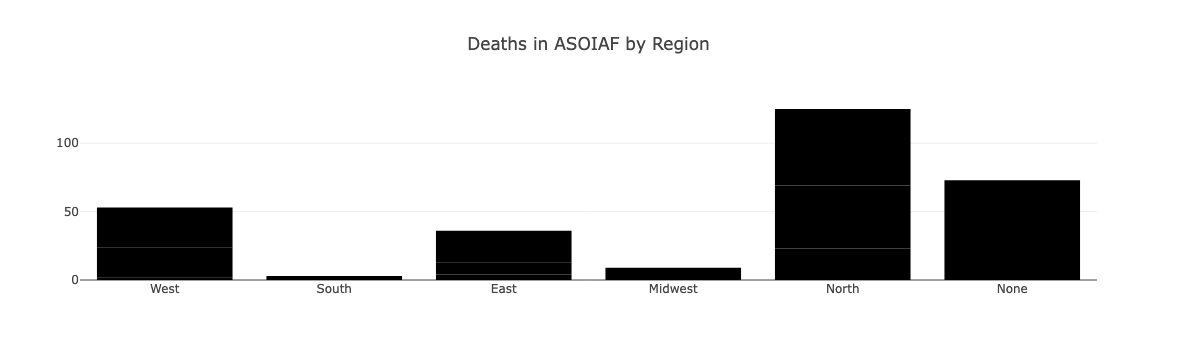

In [19]:
data = [go.Bar(x = df4['Westeros Location'],
               y = df4['Death Count'],
               marker=dict(color='black')
              )]

layout = dict(title = "Deaths in ASOIAF by Region")
fig = dict(data = data, layout = layout)
iplot(fig, validate = False)